In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from datetime import timedelta

# Input data
data = [
    ["2025-07-29T23:46:37Z", "us", 1, "Origin updated"],
    ["2025-07-30T00:27:25Z", "us", 2, "Origin updated"],
    ["2025-07-30T01:35:45Z", "us", 3, "Origin updated"],
    ["2025-07-30T01:47:36Z", "us", 4, "Scheduled repeat"],
    ["2025-07-30T06:09:17Z", "us", 5, "Adding finite-fault V1"],
    ["2025-07-30T15:03:00Z", "us", 6, "Adding finite fault V2 (Yeck)"],
    ["2025-07-30T23:46:54Z", "us", 7, "Scheduled repeat"],
    ["2025-07-31T03:01:52Z", "us", 8, "Origin updated"],
    ["2025-08-01T05:11:05Z", "us", 9, "Origin updated"],
    ["2025-08-05T20:01:23Z", "us", 10, "Adding finite fault V3 (Yeck)"]
]

# Convert to DataFrame
df = pd.DataFrame(data, columns=["timestamp", "region", "id", "event"])
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["dummy"] = 1  # Dummy column for plotting
df["time_delta"] = (df["timestamp"] - df["timestamp"].min()).dt.total_seconds()
df["time_delta_hr"] = (df["timestamp"] - df["timestamp"].min()).astype(str)
df["time_delta"]
# Convert time delta to seconds
df

,timestamp,region,id,event,dummy,time_delta,time_delta_hr
0,2025-07-29 23:46:37+00:00,us,1,Origin updated,1,0.0,0 days 00:00:00
1,2025-07-30 00:27:25+00:00,us,2,Origin updated,1,2448.0,0 days 00:40:48
2,2025-07-30 01:35:45+00:00,us,3,Origin updated,1,6548.0,0 days 01:49:08
3,2025-07-30 01:47:36+00:00,us,4,Scheduled repeat,1,7259.0,0 days 02:00:59
4,2025-07-30 06:09:17+00:00,us,5,Adding finite-fault V1,1,22960.0,0 days 06:22:40
5,2025-07-30 15:03:00+00:00,us,6,Adding finite fault V2 (Yeck),1,54983.0,0 days 15:16:23
6,2025-07-30 23:46:54+00:00,us,7,Scheduled repeat,1,86417.0,1 days 00:00:17
7,2025-07-31 03:01:52+00:00,us,8,Origin updated,1,98115.0,1 days 03:15:15
8,2025-08-01 05:11:05+00:00,us,9,Origin updated,1,192268.0,2 days 05:24:28
9,2025-08-05 20:01:23+00:00,us,10,Adding finite fault V3 (Yeck),1,591286.0,6 days 20:14:46


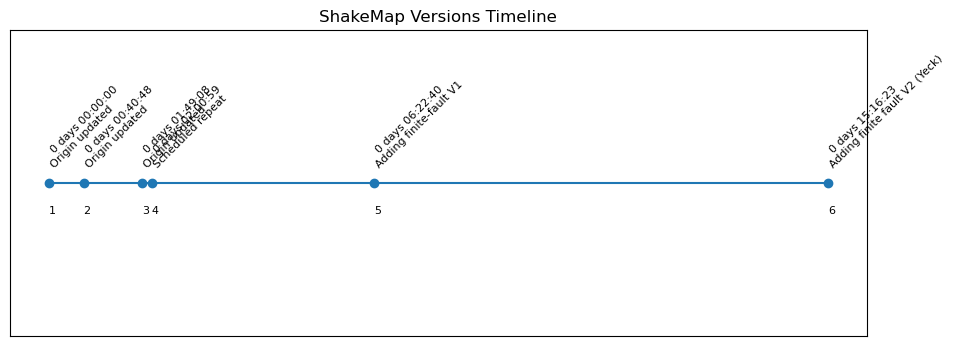

In [64]:

# Plot
plt.figure(figsize=(10, 4))
plt.plot(df["time_delta"][0:6], df["dummy"][0:6], marker="o", linestyle="-")

for i in range(6):
    # print(f"i: {i}, time_delta: {df['time_delta'][i]}, dummy: {df['dummy'][i]}")
    plt.text(
        df["time_delta"][i],
        df["dummy"][i] + 0.1,  # slightly above the point
        str(df["time_delta_hr"][i]),
        fontsize=8, rotation=45
    )
    plt.text(
        df["time_delta"][i],
        df["dummy"][i] - 0.1,  # slightly above the point
        str(df["id"][i]),
        fontsize=8, rotation=0
    )
    plt.text(
        df["time_delta"][i],
        df["dummy"][i]+0.05,  # slightly above the point
        str(df["event"][i]),
        # ha='left', va='bottom',
        fontsize=8, rotation=45
    )
# plt.text(1e4,1.01,'test')

plt.title("ShakeMap Versions Timeline")
plt.ylim(0.5, 1.5)
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
# plt.tight_layout()
plt.savefig("/Users/hyin/shakemap_profiles/default/data/us6000qw60/comcat/shakemap_timeline.png", dpi=300)

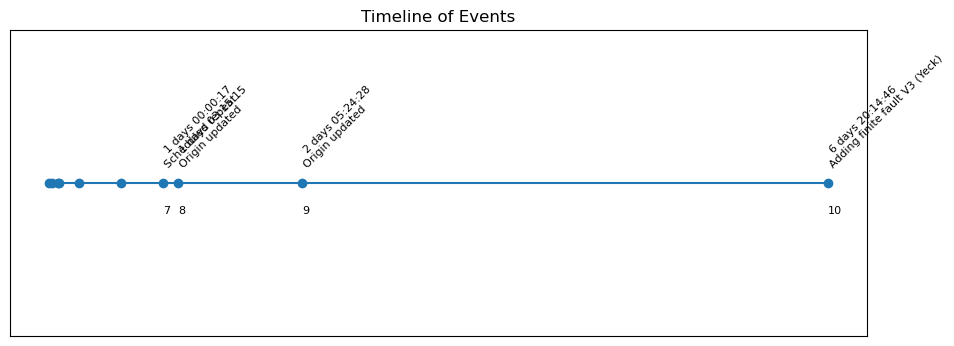

In [70]:

# Plot
plt.figure(figsize=(10, 4))
plt.plot(df["time_delta"], df["dummy"], marker="o", linestyle="-")

for i in [6,7,8,9]:
    # print(f"i: {i}, time_delta: {df['time_delta'][i]}, dummy: {df['dummy'][i]}")
    plt.text(
        df["time_delta"][i],
        df["dummy"][i] + 0.1,  # slightly above the point
        str(df["time_delta_hr"][i]),
        fontsize=8, rotation=45
    )
    plt.text(
        df["time_delta"][i],
        df["dummy"][i] - 0.1,  # slightly above the point
        str(df["id"][i]),
        fontsize=8, rotation=0
    )
    plt.text(
        df["time_delta"][i],
        df["dummy"][i]+0.05,  # slightly above the point
        str(df["event"][i]),
        # ha='left', va='bottom',
        fontsize=8, rotation=45
    )
# plt.text(1e4,1.01,'test')

plt.ylim(0.5, 1.5)
plt.title("Timeline of Events")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
# plt.tight_layout()
plt.savefig("/Users/hyin/shakemap_profiles/default/data/us6000qw60/comcat/shakemap_timeline_full.png", dpi=300)